In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

# Airplane rentals by the Brazilian Congress

I'm looking at how much Brazilian members of the Chamber of Deputies (the lower house) spend on airplane rentals. 
I want to know which deputy spends the most, to which party they're affiliated, what states they come from, what is the most hired airplane company and in what year and month deputies spent the most on airplane rentals. 

In [2]:
df = pd.read_csv("gastos-deputados.csv")
df.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
0,2018,6,2018-06-25 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA,13400.0,0.0,13400.0
1,2018,6,2018-06-11 00:00:00+00:00,ÁTILA LIRA,PSB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARA TAXI AEREO LTDA,7240.0,0.0,7240.0
2,2018,6,2018-06-08 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7500.0,0.0,7500.0
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0


In [18]:
# The df has data until 2013

df.numano.tail(3)

1773    2013
1774    2013
1775    2013
Name: numano, dtype: int64

## Let's answer a few questions. 

**1. How many rentals were made over the course of the past five years (2013 - 2018)?**

In [23]:
df.shape

(1776, 12)

In [25]:
# Looks like there were 1776 rentals since 2013.

**2. In what years did Hose representatives spend the most money?**

In [168]:
df.groupby('numano').vlrliquido.sum()

numano
2013     714143.82
2014    5176484.21
2015    2773230.11
2016    3400546.44
2017    2842802.46
2018    1299283.09
Name: vlrliquido, dtype: float64

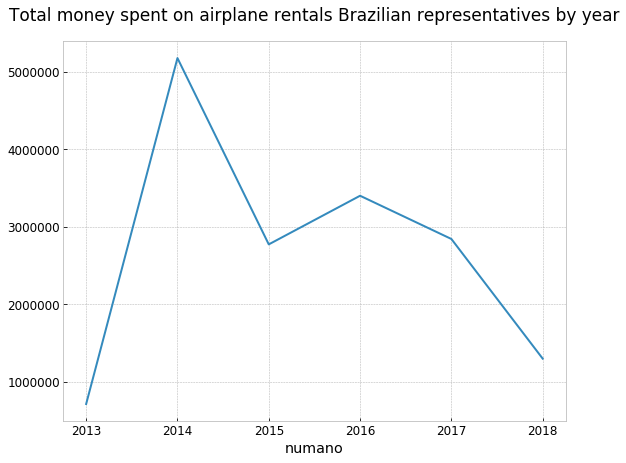

In [374]:
# Now let's see in what years deputies spent the most money: 

# by amount spent 

ax = df.groupby('numano').vlrliquido.sum().plot(figsize=(9,7))
ax.set_title('Total money spent on airplane rentals Brazilian representatives by year', pad=20)
ax.title.set_fontsize(17)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12
})

In [56]:
# Looks like 2014 was by far the year with most spendings. 

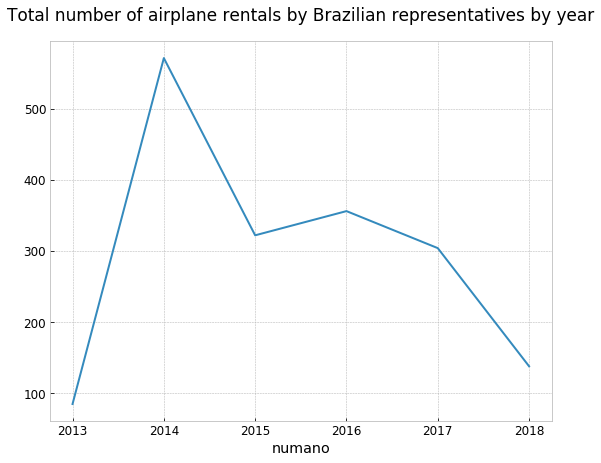

In [375]:
# by number of transactions

ax = df.groupby('numano').vlrliquido.count().plot(figsize=(9,7))
ax.set_title('Total number of airplane rentals by Brazilian representatives by year', pad=20)
ax.title.set_fontsize(17)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12
})

In [395]:
# What's the month with the most rentals?

df.nummes.value_counts()

5     199
12    182
3     172
6     161
9     159
11    151
7     139
4     132
1     131
2     123
10    115
8     112
Name: nummes, dtype: int64

In [21]:
# Now let's look at what were the highest prices deputies have ever paid to rent airplanes. 

df.sort_values(by='vlrliquido', ascending=False).head(10)

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
1235,2014,10,2014-11-24 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,184500.0,0.0,184500.0
1137,2014,12,2014-12-30 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,92655.0,0.0,91546.1
1561,2014,4,2014-04-06 00:00:00+00:00,ELIENE LIMA,PSD,MT,LOCAÇÃO OU FRETAMENTO DE AERONAVES,97527614000168,S. L. DE SOUZA TURISMO - ME,82000.0,0.0,82000.0
1722,2013,11,2013-12-13 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,79000.0,0.0,79000.0
1407,2014,6,2014-06-25 00:00:00+00:00,SILAS CÂMARA,PRB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03293432000126,PARINTINS TAXI AEREO LTDA,68000.0,0.0,68000.0
1600,2014,2,2014-03-18 00:00:00+00:00,SABINO CASTELO BRANCO,PTB,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPAÇÕES LTDA,62000.0,0.0,62000.0
1291,2014,10,2014-10-27 00:00:00+00:00,RAUL LIMA,PP,RR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,***34555***,RODRIGO MARTINS DE MELLO,55000.0,0.0,55000.0
1142,2014,12,2014-12-26 00:00:00+00:00,LUCIO VIEIRA LIMA,MDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA - AEROTAXI ABAETÉ LTDA.,45000.0,0.0,45000.0
1446,2014,6,2014-06-05 00:00:00+00:00,ÂNGELO AGNOLIN,PDT,TO,LOCAÇÃO OU FRETAMENTO DE AERONAVES,***18300***,Mauro Boaventura de Souza,68200.0,29000.0,39200.0
421,2017,2,2017-02-08 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA.,39000.0,0.0,39000.0


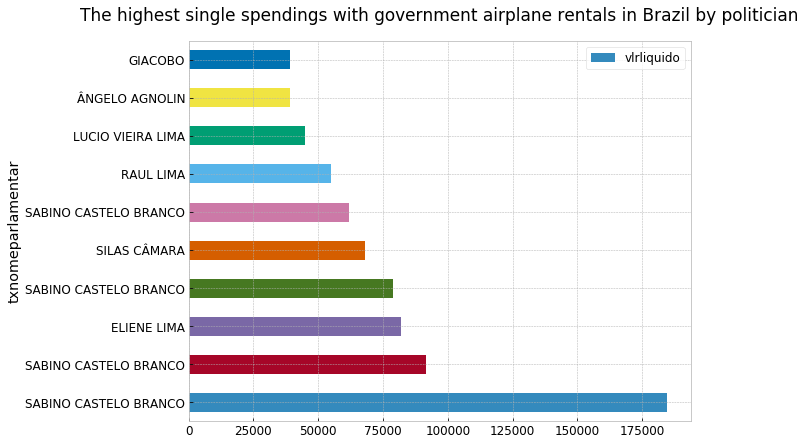

In [376]:
# Let's plot that. 

ax = df.sort_values(by='vlrliquido', ascending=False).head(10).plot(kind='barh', x='txnomeparlamentar', y='vlrliquido', figsize=(9,7))
ax.set_title('The highest single spendings with government airplane rentals in Brazil by politician', pad=20)
ax.title.set_fontsize(17)

**3. Who are the representatives who have spent the most money on airplane rentals?**

In [99]:
df.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10)

txnomeparlamentar
ÁTILA LINS               1223431.77
PAES LANDIM               666535.07
SILAS CÂMARA              542987.20
NILSON PINTO              517850.00
SABINO CASTELO BRANCO     486950.01
JUTAHY JUNIOR             477759.51
GIACOBO                   476520.00
JÚLIO CESAR               435967.00
SÁGUAS MORAES             416015.83
IRACEMA PORTELLA          378042.60
Name: vlrliquido, dtype: float64

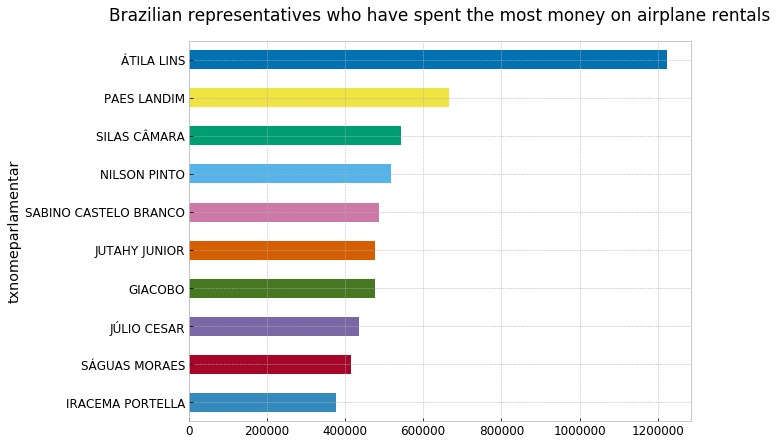

In [377]:
ax = df.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('Brazilian representatives who have spent the most money on airplane rentals', pad=20)
ax.title.set_fontsize(17)

**4. Who are the 10 deputies who have made the highest number of total transactions?**

In [64]:
df.txnomeparlamentar.value_counts().head(10).sort_values(ascending=False)

ÁTILA LINS              109
NILSON PINTO             63
FRANCISCO CHAPADINHA     60
JÚLIO CESAR              50
PAES LANDIM              49
SÁGUAS MORAES            48
WILSON FILHO             45
NILSON LEITÃO            41
JUTAHY JUNIOR            37
THIAGO PEIXOTO           34
Name: txnomeparlamentar, dtype: int64

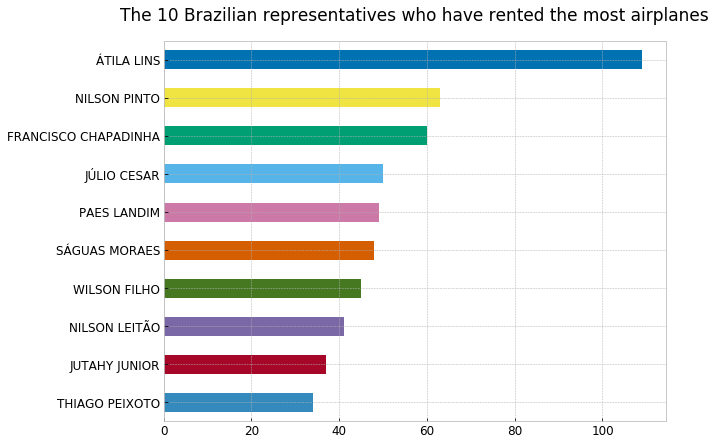

In [378]:
ax = df.txnomeparlamentar.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('The 10 Brazilian representatives who have rented the most airplanes', pad=20)
ax.title.set_fontsize(17)

In [70]:
# Looks like Átila Lins has rented an airplane 109 times. :O

**5. What states spend the most on airplane rentals?**

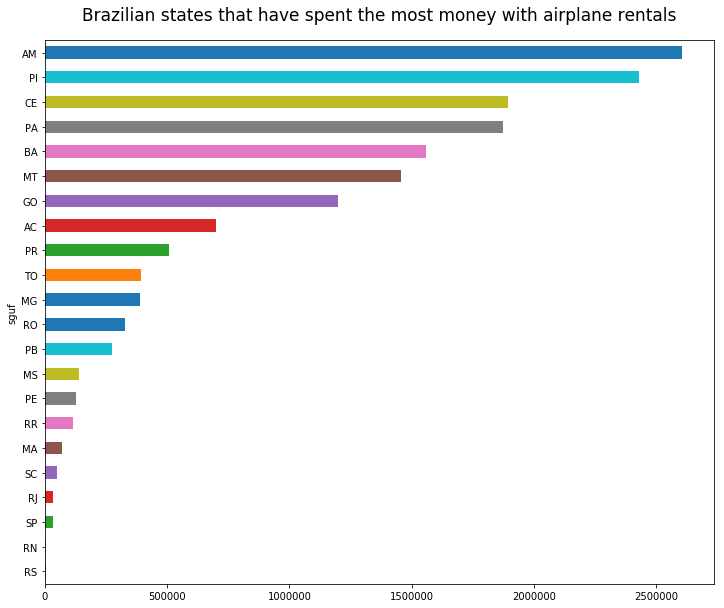

In [178]:
ax = df.groupby('sguf').vlrliquido.sum().sort_values(ascending=True).plot(kind='barh', figsize=(12,10))
ax.set_title('Brazilian states that have spent the most money with airplane rentals', pad=20)
ax.title.set_fontsize(17)

**6. And what party spends the most?**

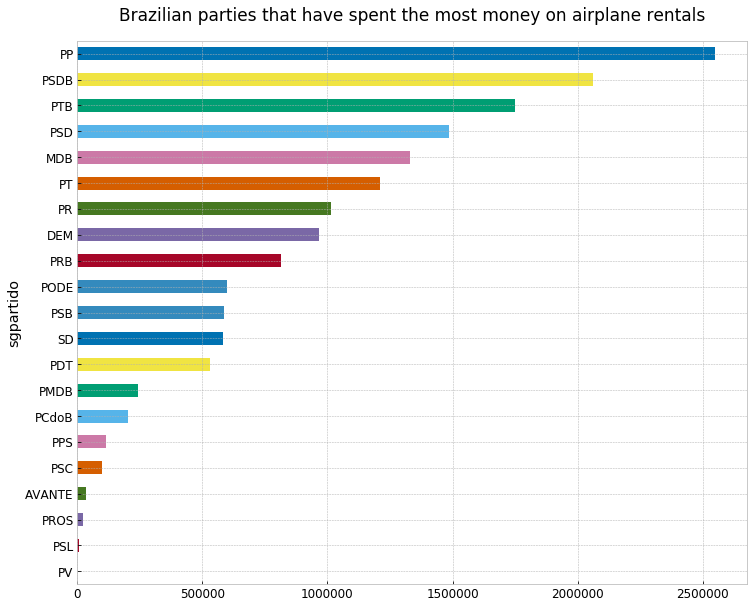

In [379]:
ax = df.groupby('sgpartido').vlrliquido.sum().sort_values(ascending=True).plot(kind='barh', figsize=(12,10))
ax.set_title('Brazilian parties that have spent the most money on airplane rentals', pad=20)
ax.title.set_fontsize(17)

## Now, let's narrow down the data to rentals made only in 2018.

In [166]:
df_2018 = df[df.numano == 2018]
df_2018.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
0,2018,6,2018-06-25 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA,13400.0,0.0,13400.0
1,2018,6,2018-06-11 00:00:00+00:00,ÁTILA LIRA,PSB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARA TAXI AEREO LTDA,7240.0,0.0,7240.0
2,2018,6,2018-06-08 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7500.0,0.0,7500.0
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0


**7. How much money was spent in total on airplane rentals in 2018?**

In [103]:
df_2018.vlrliquido.sum()

1299283.0899999999

In [104]:
# MORE THAN ONE MILLION REAIS! 

**8. Who are the 10 representatives who have rented the most airplanes in 2018?**

In [117]:
df_2018.txnomeparlamentar.value_counts().head(10)

ÁTILA LINS              11
WLADIMIR COSTA          11
NILSON LEITÃO            8
HÉLIO LEITE              6
PAES LANDIM              6
FRANCISCO CHAPADINHA     6
PAUDERNEY AVELINO        6
JUTAHY JUNIOR            5
NILSON PINTO             4
ARNALDO JORDY            4
Name: txnomeparlamentar, dtype: int64

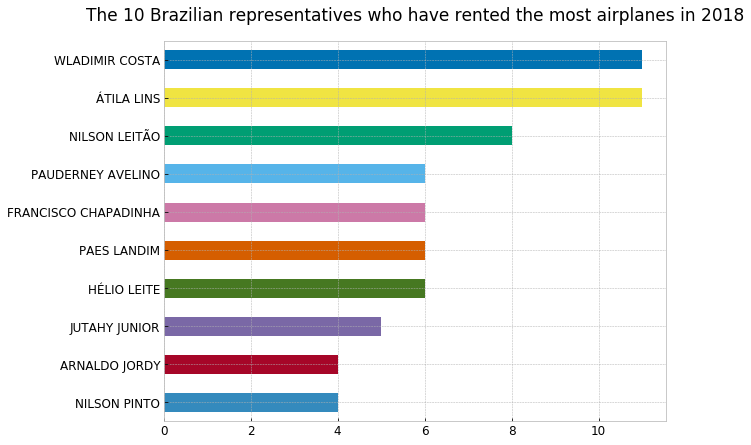

In [380]:
ax = df_2018.txnomeparlamentar.value_counts(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('The 10 Brazilian representatives who have rented the most airplanes in 2018', pad=20)
ax.title.set_fontsize(17)

In [118]:
# Átila is still on top. He seems to really like flying.

**9. And which representatives have spent the most money on airplane rentals in 2018?**

In [89]:
df_2018.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10)

txnomeparlamentar
ÁTILA LINS           126819.80
SILAS CÂMARA         107400.00
PAES LANDIM           84966.01
NILSON LEITÃO         69302.10
WLADIMIR COSTA        68300.00
GIACOBO               61800.00
JUTAHY JUNIOR         57500.00
VALTENIR PEREIRA      54060.00
LUCIO VIEIRA LIMA     51200.00
CARLOS SOUZA          40550.00
Name: vlrliquido, dtype: float64

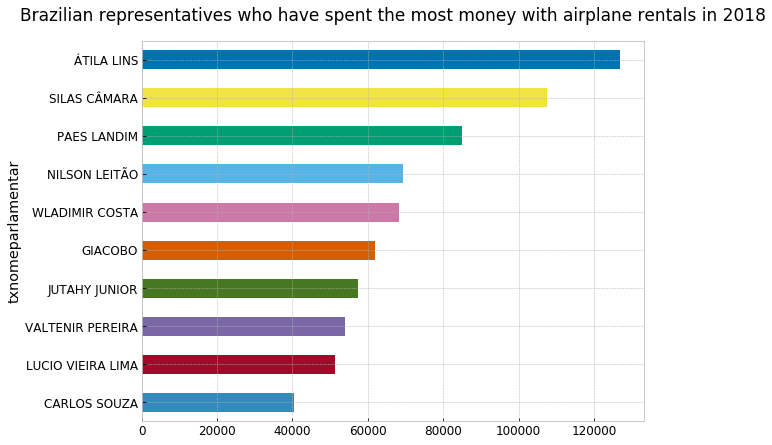

In [381]:
ax = df_2018.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('Brazilian representatives who have spent the most money with airplane rentals in 2018', pad=20)
ax.title.set_fontsize(17)

## Same thing for 2017

In [165]:
df_2017 = df[df.numano == 2017]
df_2017.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
138,2017,12,2017-12-28 00:00:00+00:00,RAIMUNDO GOMES DE MATOS,PSDB,CE,LOCAÇÃO OU FRETAMENTO DE AERONAVES,01274847000127,TERRAL TAXI AEREO LTDA - EPP,10750.0,0.0,330.42
139,2017,12,2017-12-28 00:00:00+00:00,RAIMUNDO GOMES DE MATOS,PSDB,CE,LOCAÇÃO OU FRETAMENTO DE AERONAVES,01274847000127,TERRAL TAXI AEREO LTDA - EPP,10750.0,0.0,1.65
140,2017,12,2017-12-28 00:00:00+00:00,RAIMUNDO GOMES DE MATOS,PSDB,CE,LOCAÇÃO OU FRETAMENTO DE AERONAVES,01274847000127,TERRAL TAXI AEREO LTDA - EPP,10750.0,0.0,10267.80
141,2017,12,2017-12-28 00:00:00+00:00,RAIMUNDO GOMES DE MATOS,PSDB,CE,LOCAÇÃO OU FRETAMENTO DE AERONAVES,01274847000127,TERRAL TAXI AEREO LTDA - EPP,10750.0,0.0,150.10
142,2017,12,2017-12-27 00:00:00+00:00,ANTONIO BRITO,PSD,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7000.0,0.0,7000.00


In [167]:
df_2017.vlrliquido.sum()

2842802.46

In [169]:
df_2017.txnomeparlamentar.value_counts().head(10)

FRANCISCO CHAPADINHA       26
ÁTILA LINS                 22
ADAIL CARNEIRO             12
NILSON PINTO               11
NILSON LEITÃO              11
PAES LANDIM                10
GIACOBO                    10
SÁGUAS MORAES              10
RAIMUNDO GOMES DE MATOS     9
DANIEL VILELA               9
Name: txnomeparlamentar, dtype: int64

In [170]:
df_2017.groupby('txnomeparlamentar').vlrliquido.sum().sort_values(ascending=False).head(10)

txnomeparlamentar
ÁTILA LINS              276899.97
GIACOBO                 211000.00
PAES LANDIM             163115.00
FRANCISCO CHAPADINHA    163100.00
GENECIAS NORONHA         96025.60
NILSON LEITÃO            91219.99
SILAS CÂMARA             84750.00
JÚLIO CESAR              82050.00
SÁGUAS MORAES            82049.00
ADAIL CARNEIRO           81500.00
Name: vlrliquido, dtype: float64

## And who has been receiving all this money?

In [112]:
# by number of transactions

df.txtfornecedor.value_counts().head(20)

TOP LINE TAXI AEREO LTDA                 123
CEARÁ TAXI AÉREO LTDA                    106
AEROTEC TÁXI AÉREO LTDA                   88
STILUS TAXI AÉREO                         62
CTA CLEITON TÁXI AÉREO LTDA               60
SANTARÉM TÁXI AÉREO LTDA                  57
M.B. Locação de Aeronaves e Veiculos      53
ATA - AEROTAXI ABAETÉ LTDA.               48
MARIA DO CARMO MARIZ DE LIMA              45
RICO TAXI AEREO LTDA                      44
SETE TAXI AEREO                           41
NORTH STAR TAXI AÉREO LTDA                37
taxi aéreo fortaleza ltda                 36
EASY TAXI AEREO LTDA                      36
E.D. Semensato Comércio e Transportes     36
SOLAR TAXI AEREO                          35
AMAZONAVES TAXI AÉREO LTDA                34
TERRAL TAXI AÉREO                         30
UIRAPURU TAXI AEREO LTDA                  28
APOLO TAXI AÉREO                          28
Name: txtfornecedor, dtype: int64

In [114]:
# TOP LINE TAXI AEREO LTDA seems to be the favorite

In [146]:
# by amount received

df.groupby('txtfornecedor').vlrliquido.sum().sort_values(ascending=False).head(10)

txtfornecedor
TOP LINE TAXI AEREO LTDA              1099082.67
CEARÁ TAXI AÉREO LTDA                 1071823.65
ATA - AEROTAXI ABAETÉ LTDA.            585941.91
CTA CLEITON TÁXI AÉREO LTDA            576211.97
RICO TAXI AEREO LTDA                   575350.00
AEROTEC TÁXI AÉREO LTDA                548142.35
MANAUS AEROTAXI PARTICIPAÇÕES LTDA     494950.01
STILUS TAXI AÉREO                      493000.00
taxi aéreo fortaleza ltda              427555.53
AMAZONAVES TAXI AÉREO LTDA             408737.20
Name: vlrliquido, dtype: float64

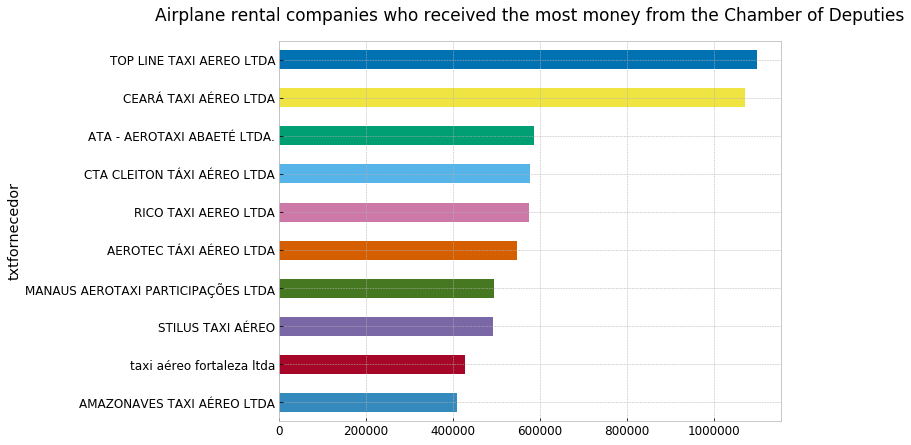

In [383]:
ax = df.groupby('txtfornecedor').vlrliquido.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,7))
ax.set_title('Airplane rental companies who received the most money from the Chamber of Deputies', pad=20)
ax.title.set_fontsize(17)

ax.set_facecolor('#FFFFFF')

In [249]:
df.numano.dtype

dtype('int64')

## Let's make pretty charts! :D

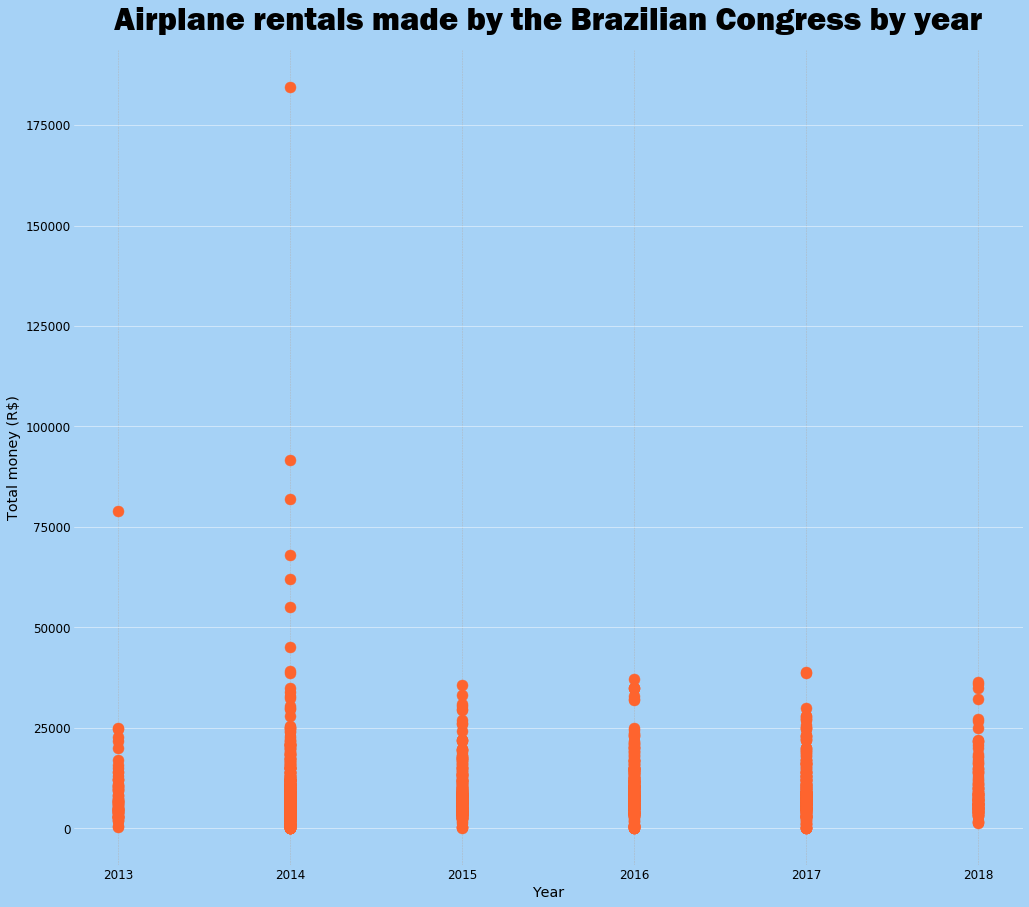

In [431]:
ax = df.plot.scatter(s=120, x='numano', y='vlrliquido', color='#FE642E', figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#A6D2F6', # colors the outside
    'axes.facecolor': '#A6D2F6', # colors the inside 
    'font.size': 12
})

sharex=False 

In [414]:
df.datemissao.head(5)

0    2018-06-25 00:00:00+00:00
1    2018-06-11 00:00:00+00:00
2    2018-06-08 00:00:00+00:00
3    2018-06-08 00:00:00+00:00
4    2018-06-04 00:00:00+00:00
Name: datemissao, dtype: object

In [416]:
df['data'] = pd.to_datetime(df['datemissao'], format="%Y-%m-%d") 
df.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido,data
0,2018,6,2018-06-25 00:00:00+00:00,GIACOBO,PR,PR,LOCAÇÃO OU FRETAMENTO DE AERONAVES,75543611000185,HELISUL TAXI AEREO LTDA,13400.0,0.0,13400.0,2018-06-25
1,2018,6,2018-06-11 00:00:00+00:00,ÁTILA LIRA,PSB,PI,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03003930000197,CEARA TAXI AEREO LTDA,7240.0,0.0,7240.0,2018-06-11
2,2018,6,2018-06-08 00:00:00+00:00,JUTAHY JUNIOR,PSDB,BA,LOCAÇÃO OU FRETAMENTO DE AERONAVES,14674451000119,ATA AEROTAXI ABAETE LTDA,7500.0,0.0,7500.0,2018-06-08
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0,2018-06-08
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0,2018-06-04


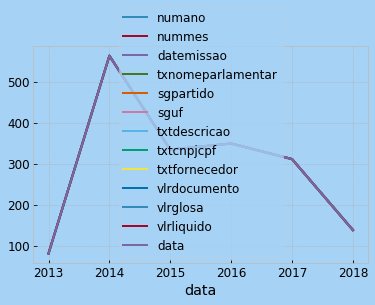

In [427]:
df.resample('A', on='data').count().plot()

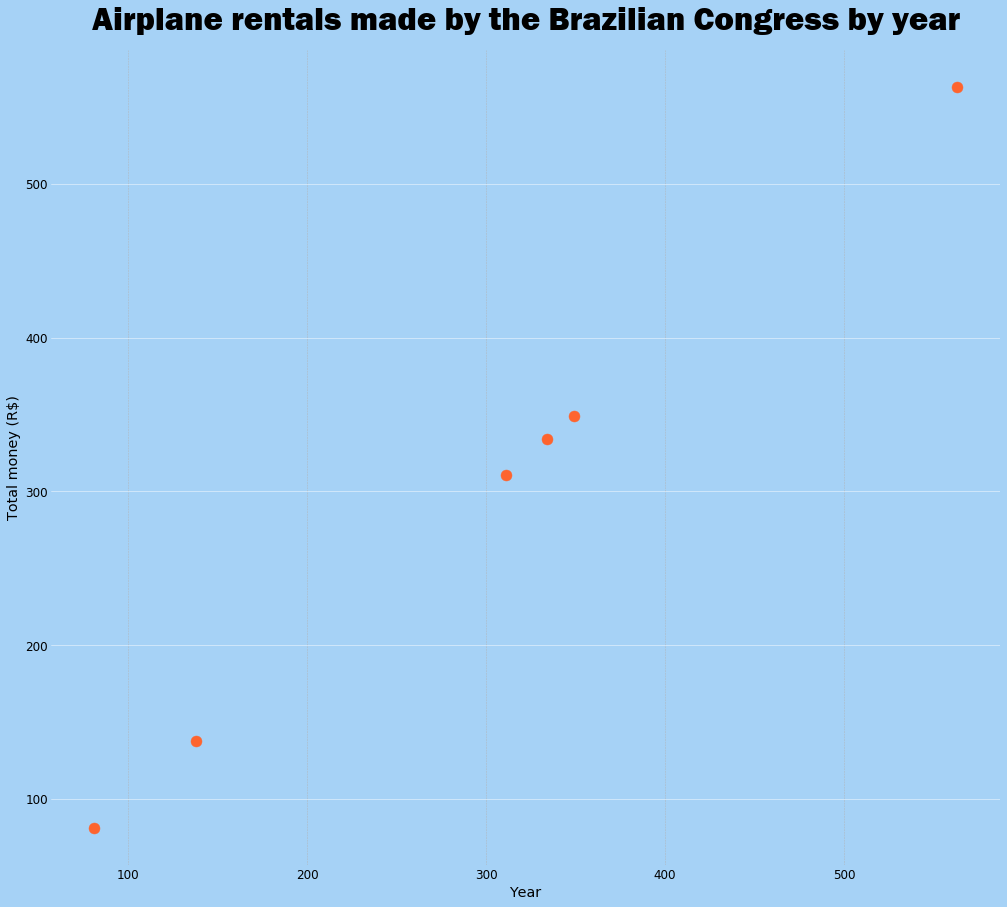

In [423]:
ax = df.resample('A', on='data').count().plot.scatter(s=120, x='numano', y='vlrliquido', color='#FE642E', figsize=(17,15))
ax.set_title('Airplane rentals made by the Brazilian Congress by year', pad=20)
ax.set_ylabel('Total money (R$)')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
#ax.set_facecolor('#A6D2F6')

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#A6D2F6', # colors the outside
    'axes.facecolor': '#A6D2F6', # colors the inside 
    'font.size': 12
})

sharex=False 

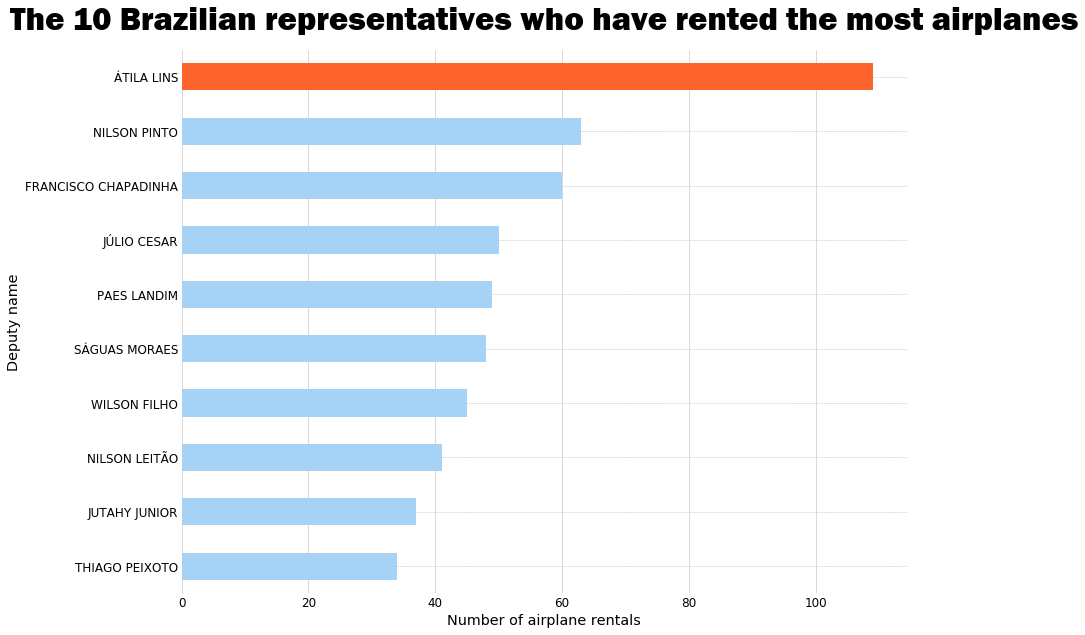

In [388]:
bar_colors = ['#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#A6D2F6', '#FE642E']

ax = df.txnomeparlamentar.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color=bar_colors, figsize=(13,10))
ax.set_title('The 10 Brazilian representatives who have rented the most airplanes', pad=20)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Deputy name')    
ax.set_xlabel('Number of airplane rentals')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#ADABAA', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#FFFFFF', # colors the outside
    'axes.facecolor': '#FFFFFF', # colors the inside 
    'font.size': 12
})


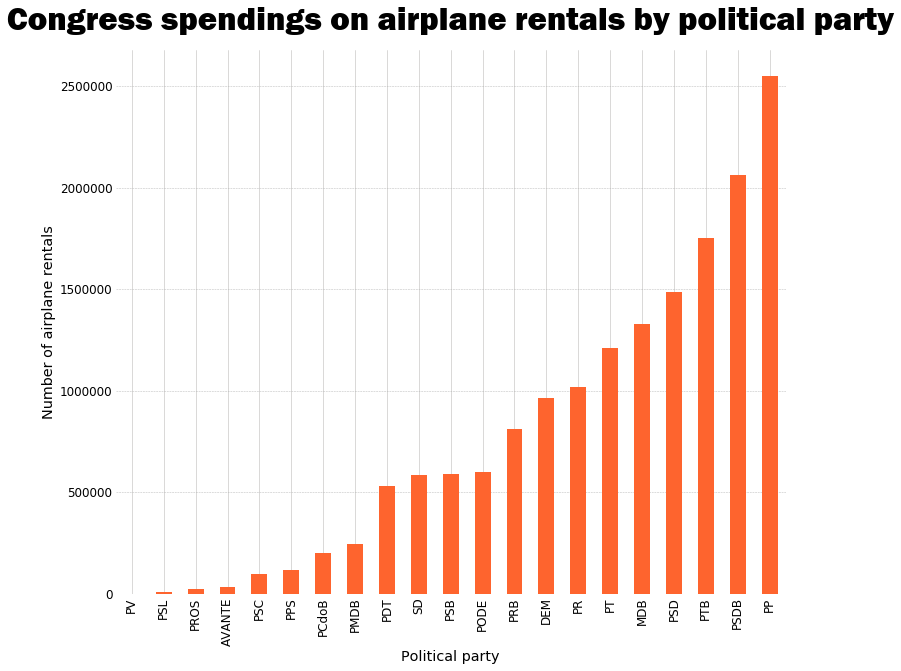

In [389]:
ax = df.groupby('sgpartido').vlrliquido.sum().sort_values(ascending=True).plot(kind='bar', color='#FE642E', figsize=(12,10))
ax.set_title('Congress spendings on airplane rentals by political party', pad=20)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of airplane rentals')    
ax.set_xlabel('Political party')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#ADABAA', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#FFFFFF', # colors the outside
    'axes.facecolor': '#FFFFFF', # colors the inside 
    'font.size': 12
})

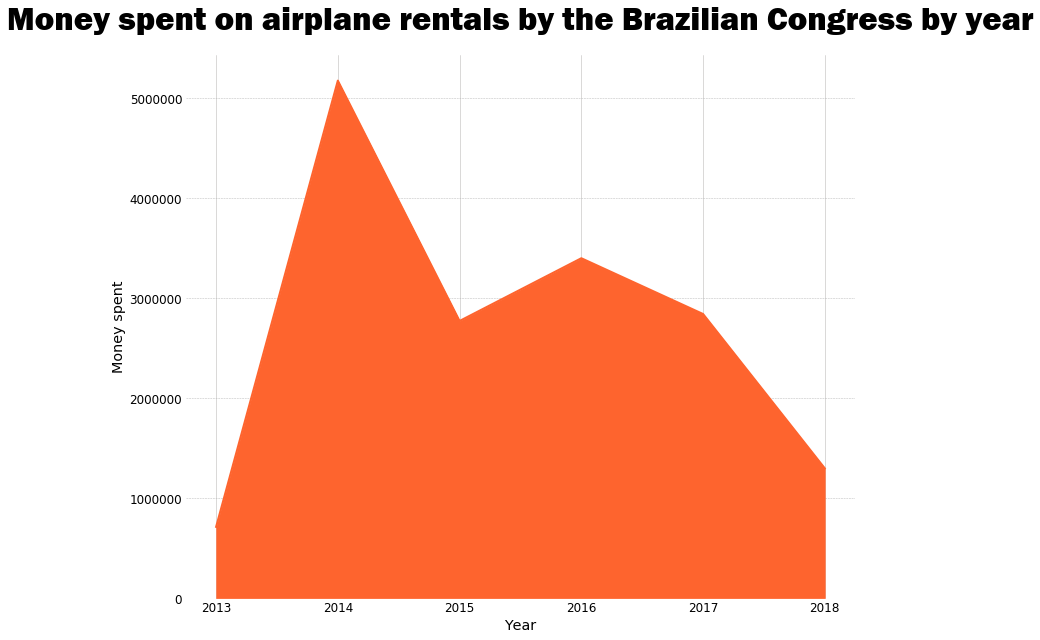

In [410]:
ax = df.groupby('numano').vlrliquido.sum().plot(kind='area', color='#FE642E', figsize=(12,10))
ax.set_title('Money spent on airplane rentals by the Brazilian Congress by year', pad=25)
ax.title.set_fontsize(17)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Money spent')    
ax.set_xlabel('Year')
ax.title.set_fontsize(33)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.grid(True, axis='x', color='#ADABAA', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#FFFFFF', # colors the outside
    'axes.facecolor': '#FFFFFF', # colors the inside 
    'font.size': 12
})

## Checking my assumptions

** Did Átila Lins rent airplanes in all six years?**

In [314]:
df_atila = df[df.txnomeparlamentar == 'ÁTILA LINS']
df_atila.head()

,numano,nummes,datemissao,txnomeparlamentar,sgpartido,sguf,txtdescricao,txtcnpjcpf,txtfornecedor,vlrdocumento,vlrglosa,vlrliquido
3,2018,6,2018-06-08 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,03090756000167,AMAZONAVES TAXI AEREO LTDA,20000.0,0.0,20000.0
4,2018,6,2018-06-04 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,7500.0,0.0,7500.0
12,2018,5,2018-05-28 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,6000.0,0.0,6000.0
23,2018,5,2018-05-12 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,04984400000130,CTA - CLEITON TAXI AEREO LTDA,21700.0,0.0,21700.0
32,2018,5,2018-05-07 00:00:00+00:00,ÁTILA LINS,PP,AM,LOCAÇÃO OU FRETAMENTO DE AERONAVES,02324940000161,MANAUS AEROTAXI PARTICIPACOES LTDA,4800.0,0.0,4800.0


In [316]:
df_atila.numano.value_counts()

2014    27
2016    25
2017    22
2015    20
2018    11
2013     4
Name: numano, dtype: int64

**How much did he spend in total?**

In [317]:
df_atila.vlrliquido.sum()

1223431.77

**Is Amazonas on the top of the list of states that spend the most because of Átila? 
Or do other representatives from there also spend a lot?**

In [318]:
df_amazonas = df[df.sguf == 'AM']
df_amazonas.groupby('txnomeparlamentar').vlrliquido.sum()

txnomeparlamentar
ALFREDO NASCIMENTO          104400.00
ARTHUR VIRGÍLIO BISNETO      32800.00
CARLOS SOUZA                 73050.00
FRANCISCO PRACIANO           47400.00
PAUDERNEY AVELINO            89500.00
PROF. GEDEÃO AMORIM           4900.00
SABINO CASTELO BRANCO       486950.01
SILAS CÂMARA                542987.20
ÁTILA LINS                 1223431.77
Name: vlrliquido, dtype: float64

**Was Átila responsible for the majority of rentals associated with his party?**

In [354]:
df_pp = df[df.sgpartido == 'PP']
df_pp.txnomeparlamentar.value_counts()

ÁTILA LINS                109
IRACEMA PORTELLA           31
ROBERTO BALESTRA           29
CLAUDIO CAJADO              9
EZEQUIEL FONSECA            6
MAIA FILHO                  6
JOSÉ LINHARES               5
FERNANDO MONTEIRO           5
JOÃO LEÃO                   5
ESPERIDIÃO AMIN             4
GLADSON CAMELI              3
SANDES JÚNIOR               3
PAULO HENRIQUE LUSTOSA      3
MÁRIO NEGROMONTE            3
BETINHO ROSADO              2
MÁRIO NEGROMONTE JR.        2
ALEXANDRE BALDY             2
LUIZ FERNANDO FARIA         2
ANDRÉ FUFUCA                2
BETO SALAME                 2
RAUL LIMA                   1
HEULER CRUVINEL             1
Name: txnomeparlamentar, dtype: int64